In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Read the Data 

data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.rename(index=str, columns={'Annual Income (k$)': 'Income',
                              'Spending Score (1-100)': 'Score'}, inplace=True)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


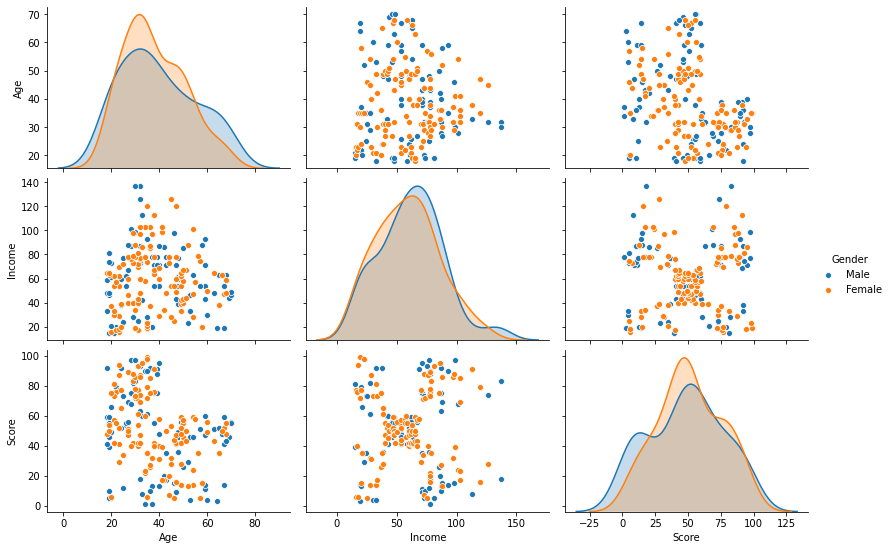

In [5]:
# Let's see our data in a detailed way with pairplot
X = data.drop(['CustomerID', 'Gender'], axis=1)
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

### K-Means

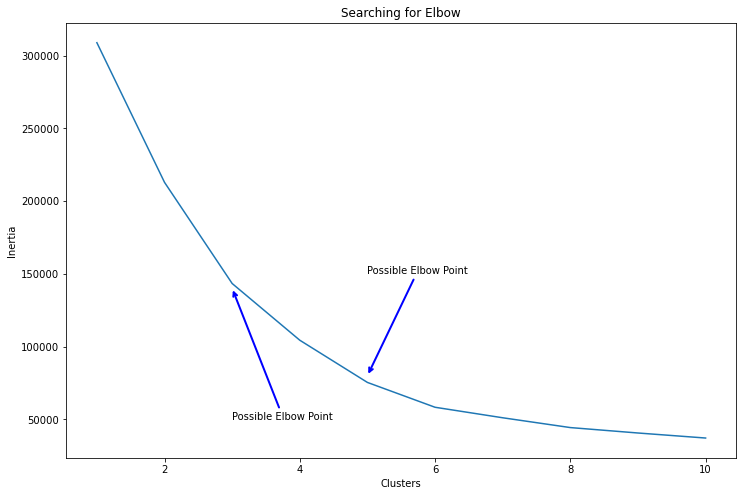

In [6]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(3, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

Elbow method tells us to select the cluster when there is a significant change in inertia. As we can see from the graph, we can say this may be either 3 or 5. Let's see both results in graph and decide.

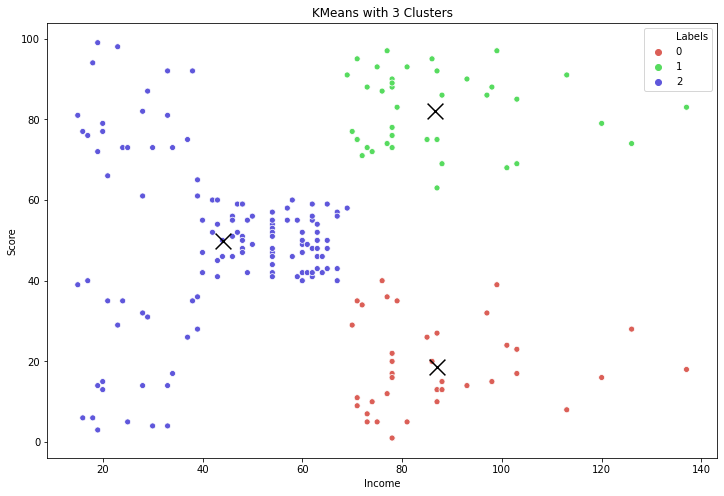

In [7]:
km3 = KMeans(n_clusters=3).fit(X)
fig = plt.figure(figsize=(12,8))
X['Labels'] = km3.labels_

#plt.scatter(X1.values[:,0],X1.values[:,1], c=km3.labels_, cmap="Set1_r", s=25)
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 3))
plt.scatter(km3.cluster_centers_[:,1] ,km3.cluster_centers_[:,2], color='black', marker="x", s=250)
plt.title('KMeans with 3 Clusters')
plt.show()

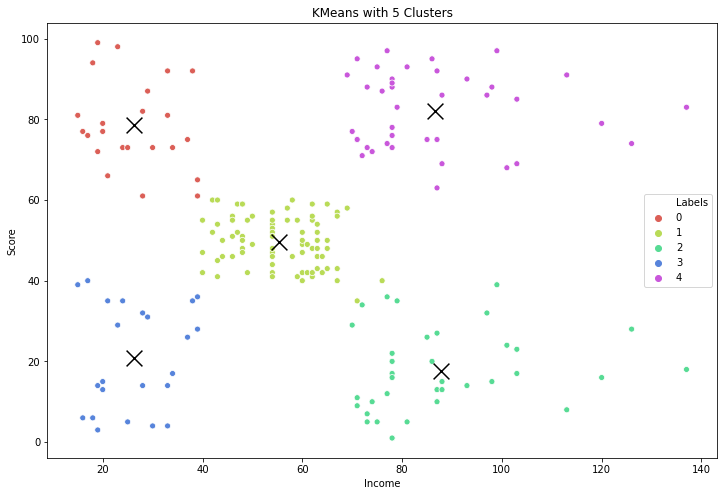

In [8]:
km5 = KMeans(n_clusters=5).fit(X)
fig = plt.figure(figsize=(12,8))
X['Labels'] = km5.labels_

#plt.scatter(X1.values[:,0],X1.values[:,1], c=km3.labels_, cmap="Set1_r", s=25)
sns.scatterplot(X['Income'], X['Score'], hue=X['Labels'], palette=sns.color_palette('hls', 5))
plt.scatter(km5.cluster_centers_[:,1] ,km5.cluster_centers_[:,2], color='black', marker="x", s=250)
plt.title('KMeans with 5 Clusters')
plt.show()

By judging from the plots, we could say that 5 cluster seems better than the 3 ones. As this is a unsupervised problem we can't really know for sure which one is the best in real life but by looking at the data it's safe to say that 5 would be our choice.

We can analyse our 5 clusters in detail now:

    •	Label 0 is mid income and mid spending
    •	Label 1 is high income and low spending
    •	Label 2 is low income and low spending
    •	Label 3 is low income and high spending
    •	Label 4 is high income and high spending

Also let's see them more clearly with swarmplot:

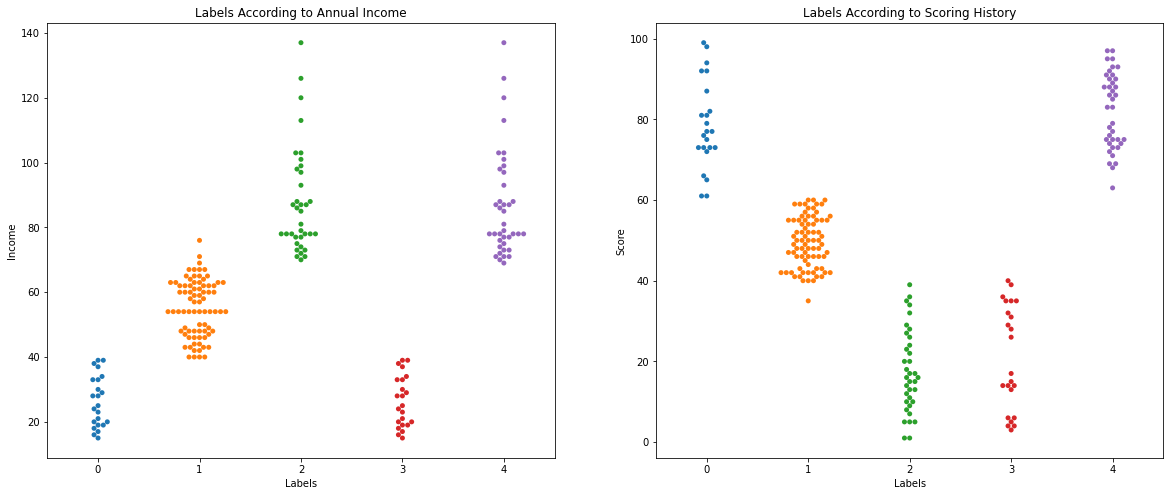

In [9]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121)
sns.swarmplot(x='Labels', y='Income', data=X, ax=ax)
ax.set_title('Labels According to Annual Income')

ax = fig.add_subplot(122)
sns.swarmplot(x='Labels', y='Score', data=X, ax=ax)
ax.set_title('Labels According to Scoring History')

plt.show()